Use seaborn's `load_dataset` function to load the `iris` database to answer the following questions:

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [3]:
iris_df = sns.load_dataset('iris')

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


1. What does the distribution of petal lengths look like?

<Axes: xlabel='petal_length', ylabel='Count'>

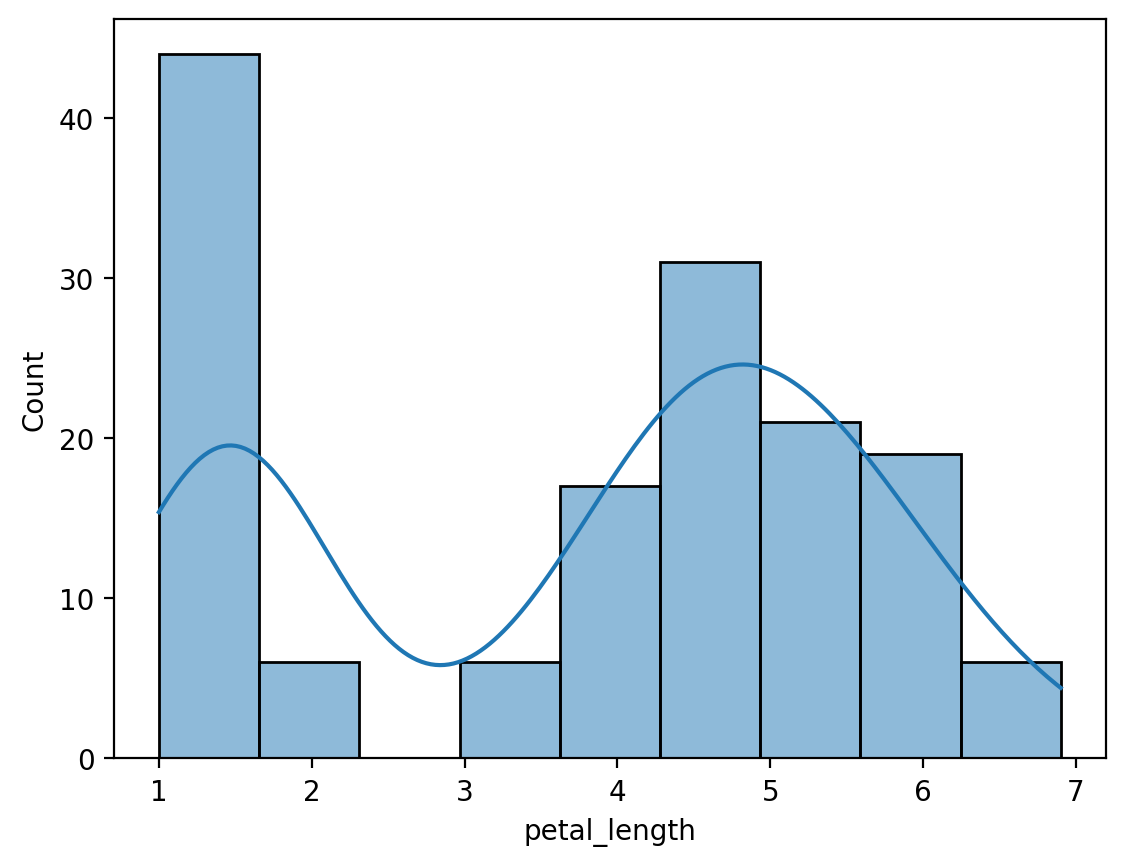

In [5]:
sns.histplot(iris_df['petal_length'], kde = True)

2. Is there a relationship between petal length and petal width?

- **yes, strong, positive relationship**

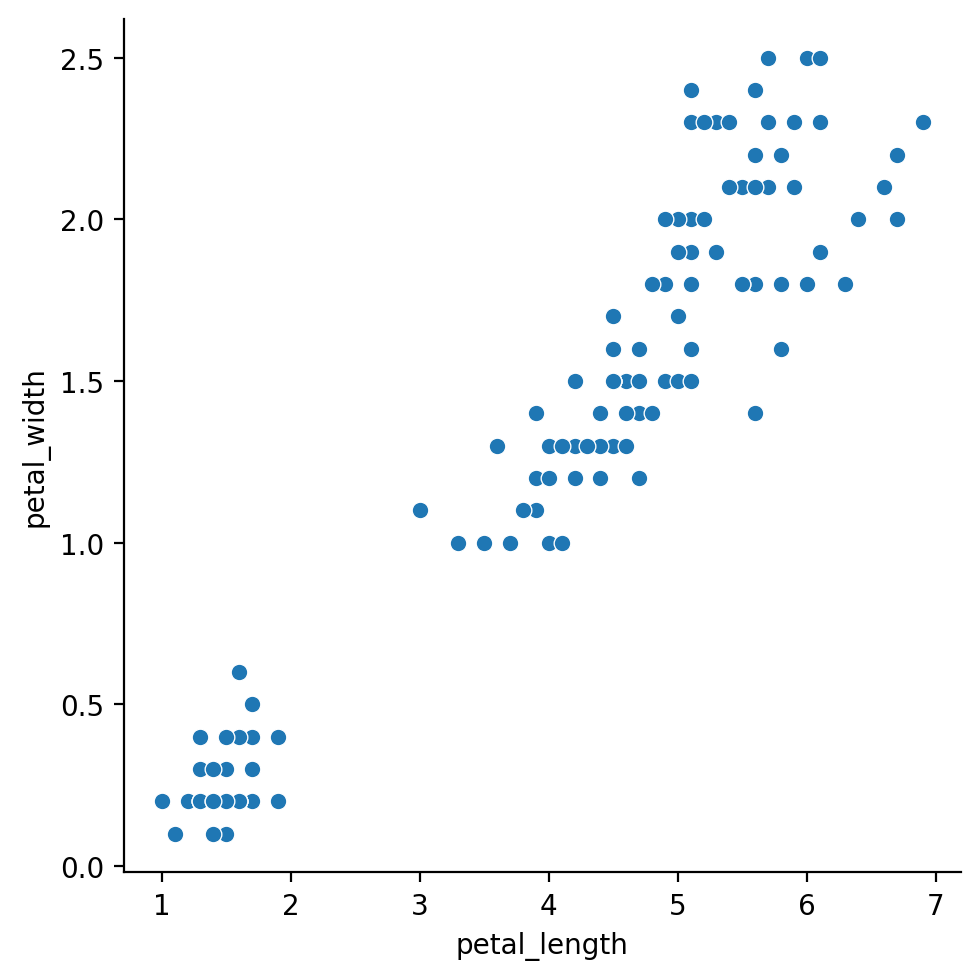

In [6]:
sns.relplot(x='petal_length', y='petal_width', data=iris_df)

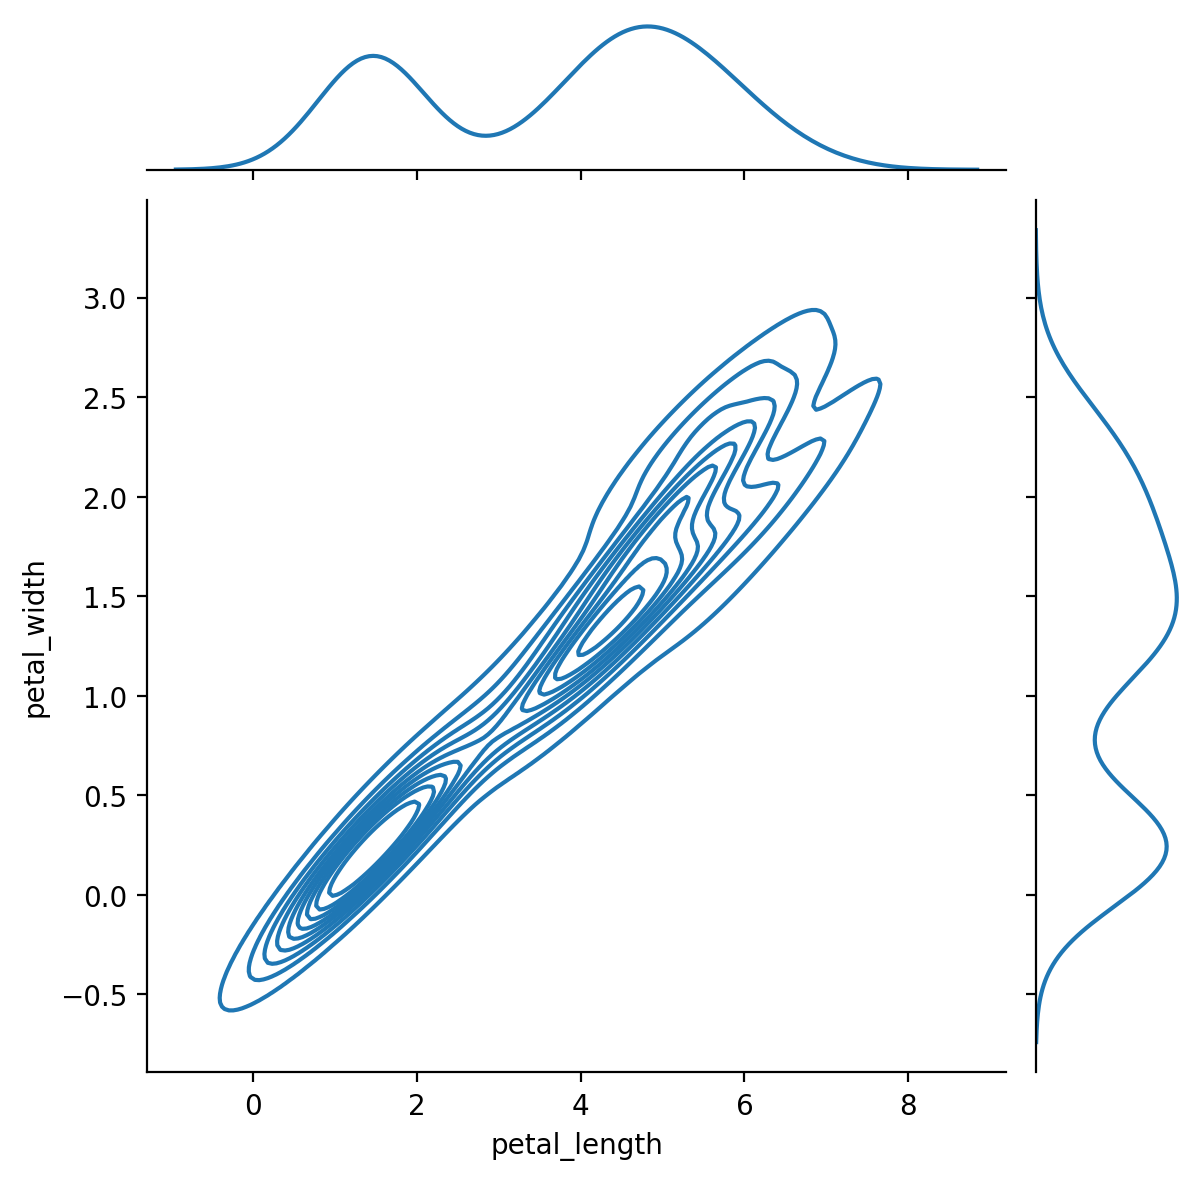

In [7]:
sns.jointplot(data=iris_df, x='petal_length', y='petal_width', kind='kde')

3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

- **It would only be reasonable to predict the setosa species**

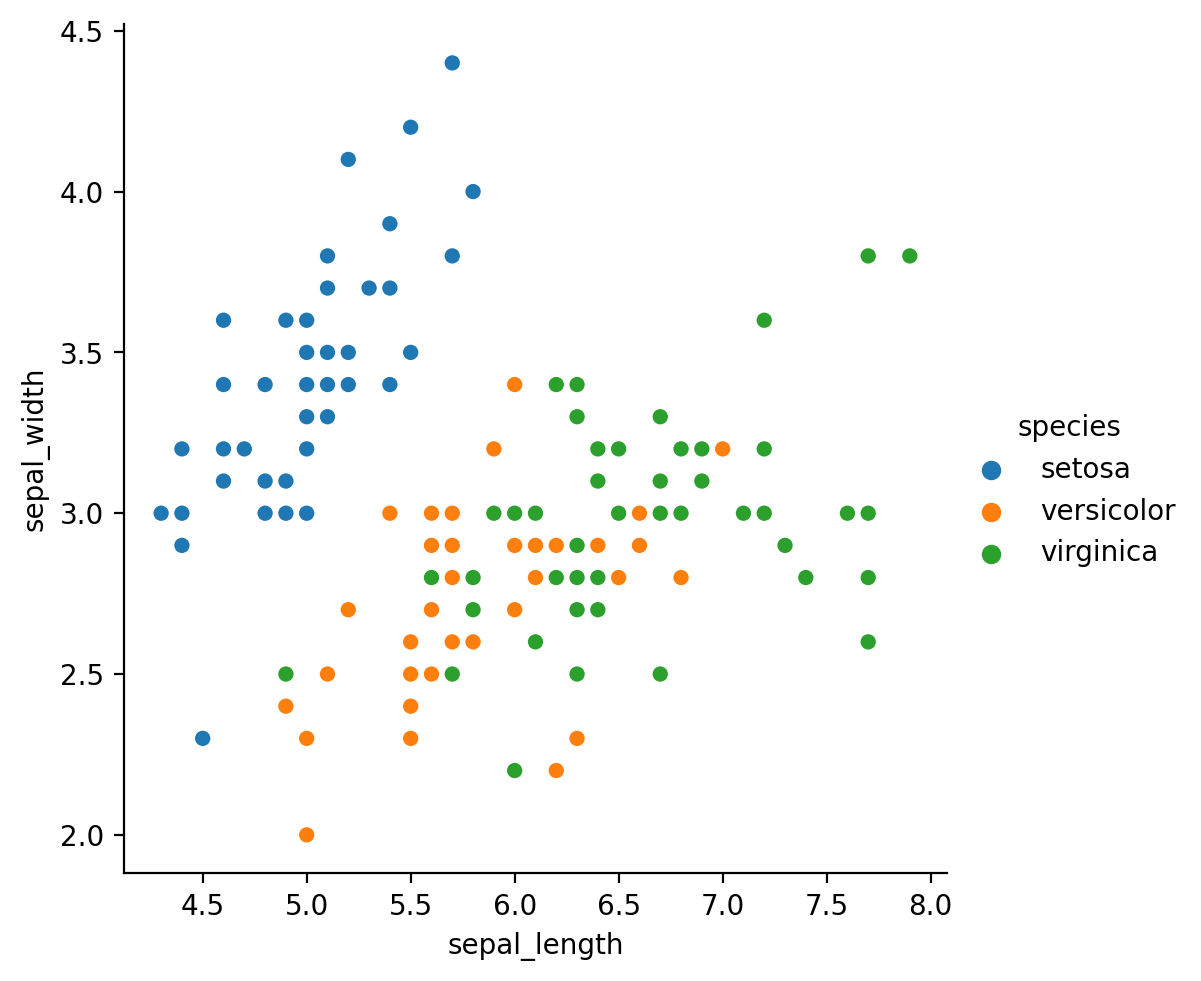

In [8]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=iris_df)

4. Which features would be best used to predict species?

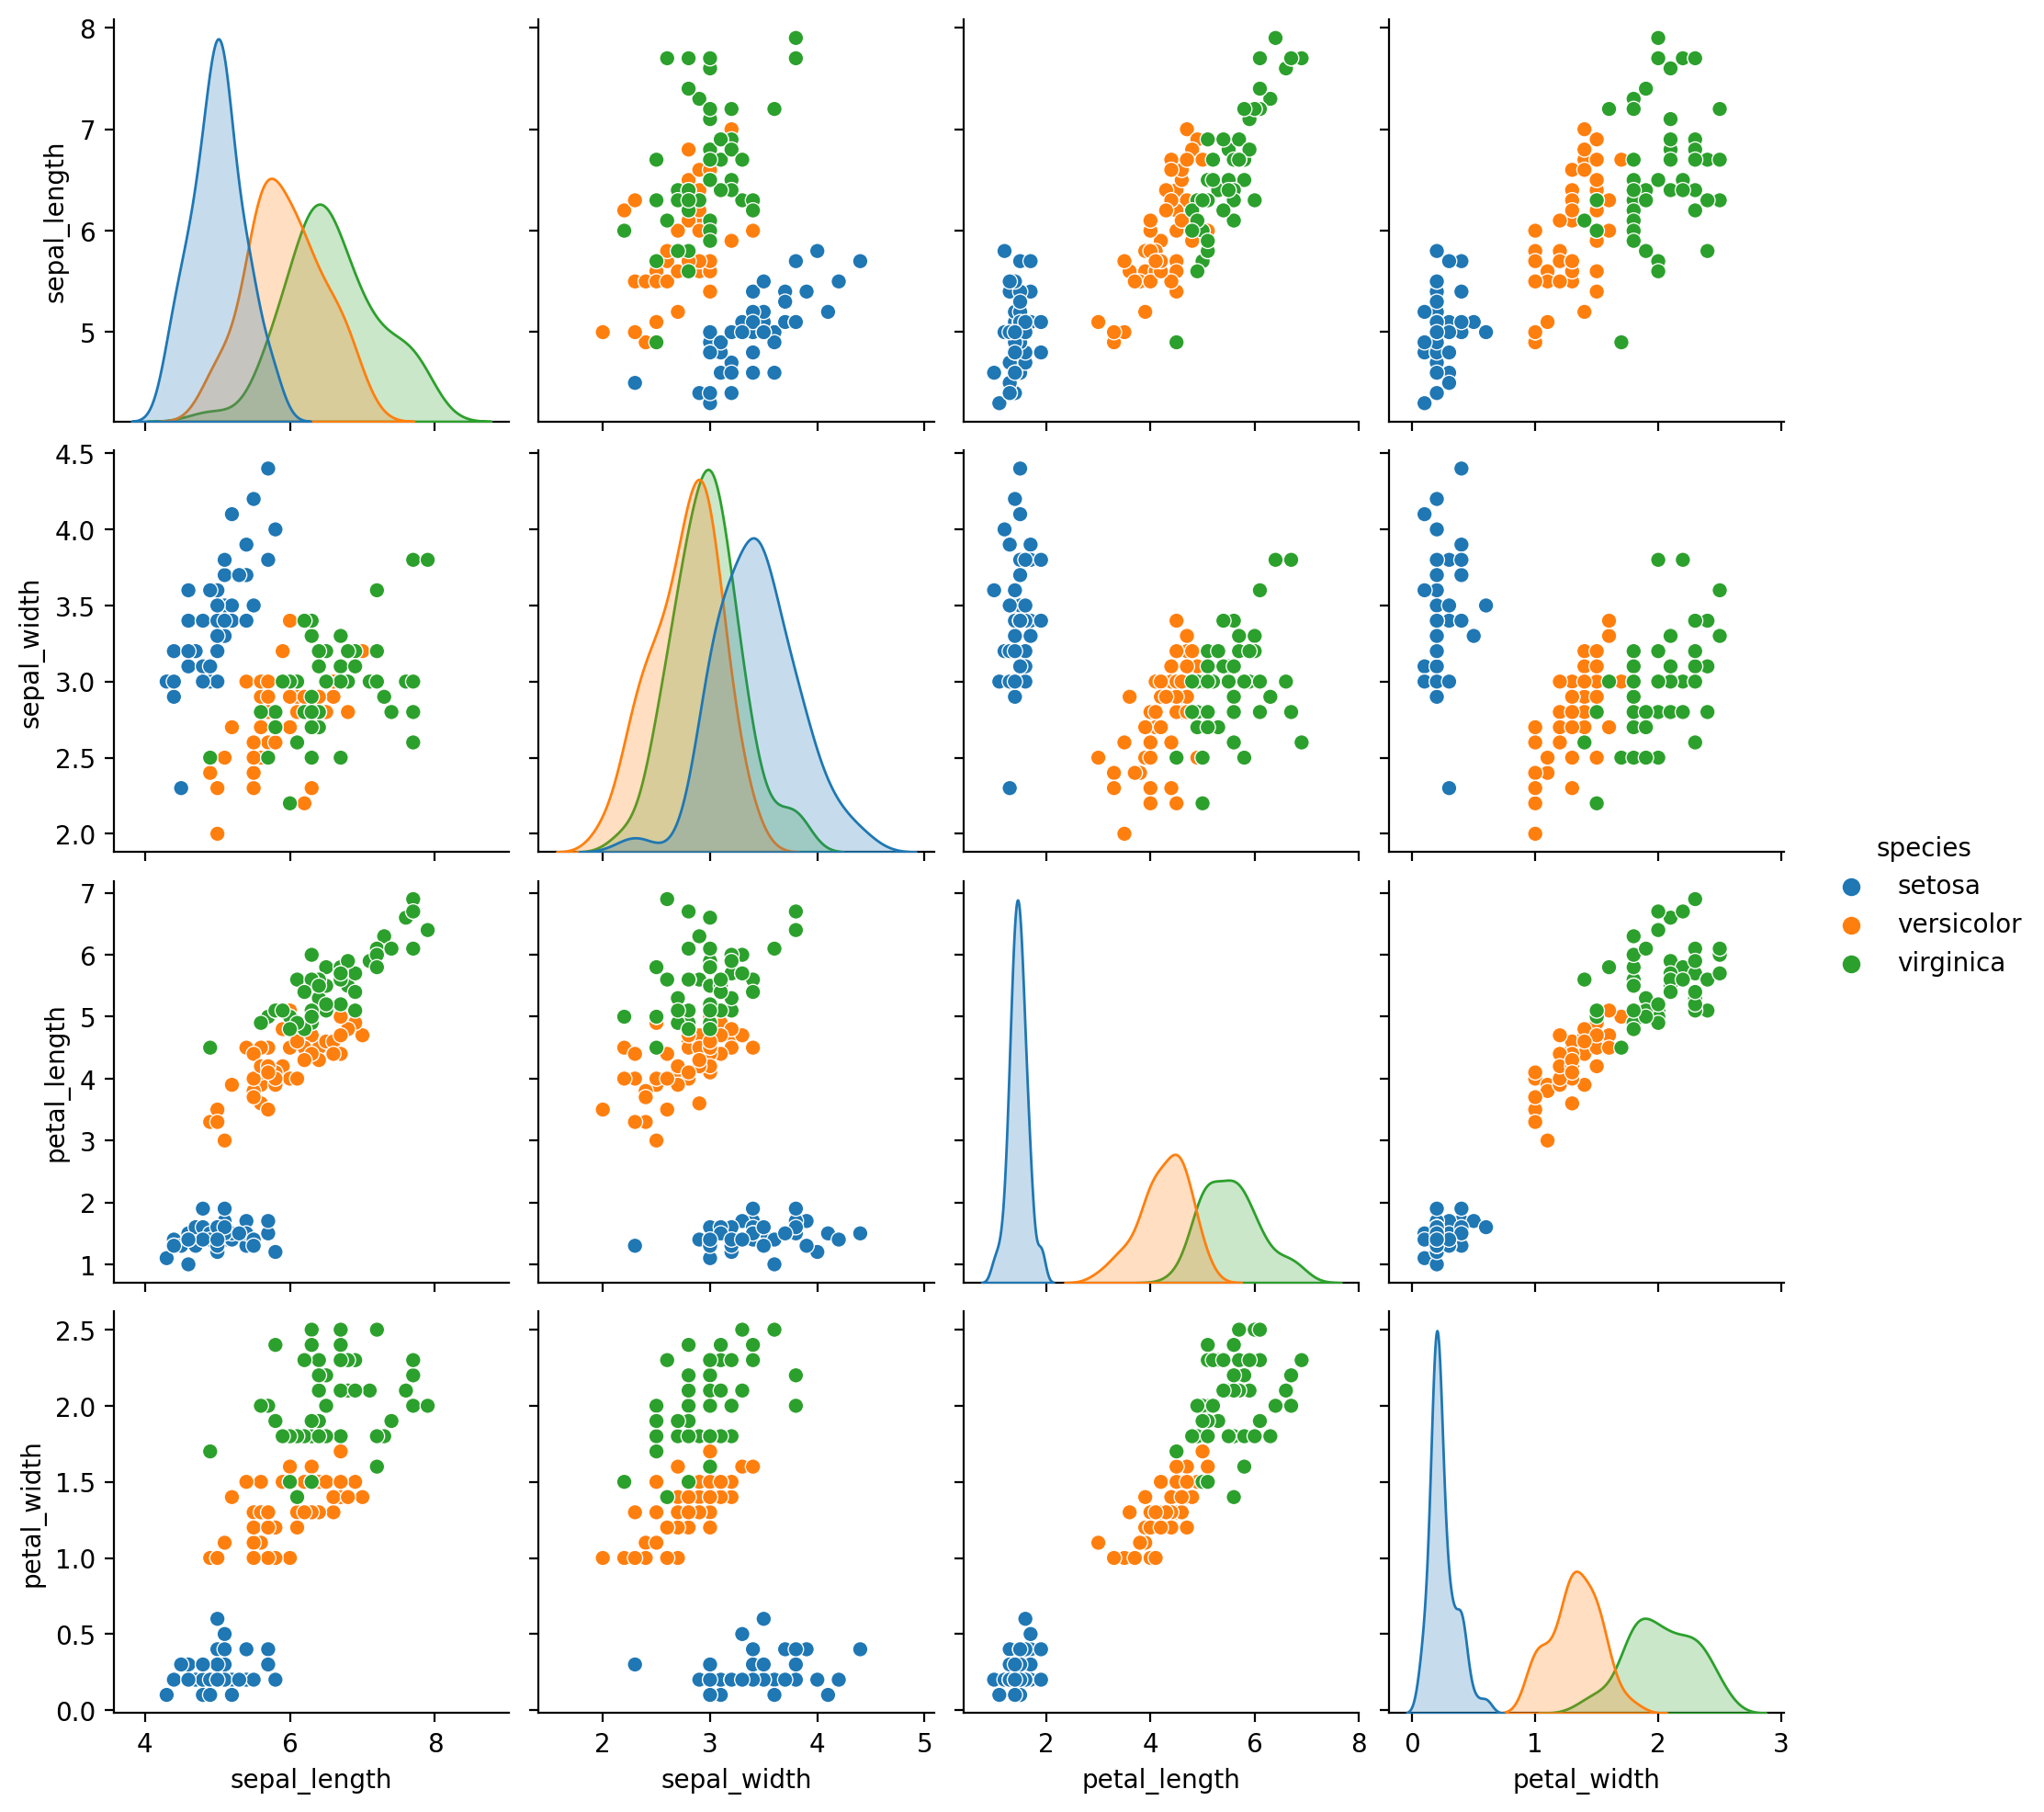

In [9]:
sns.pairplot(data=iris_df, hue='species')

1. Load the `anscombe` dataset from seaborn. Use pandas to group the data by the `dataset` column, and calculate summary statistics for each dataset. What do you notice?

    - Plot the x and y values from the `anscombe` data. Each dataset should be in a separate column.

In [10]:
anscombe_df = sns.load_dataset('anscombe')
anscombe_df.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


In [11]:
anscombe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [12]:
anscombe_df.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

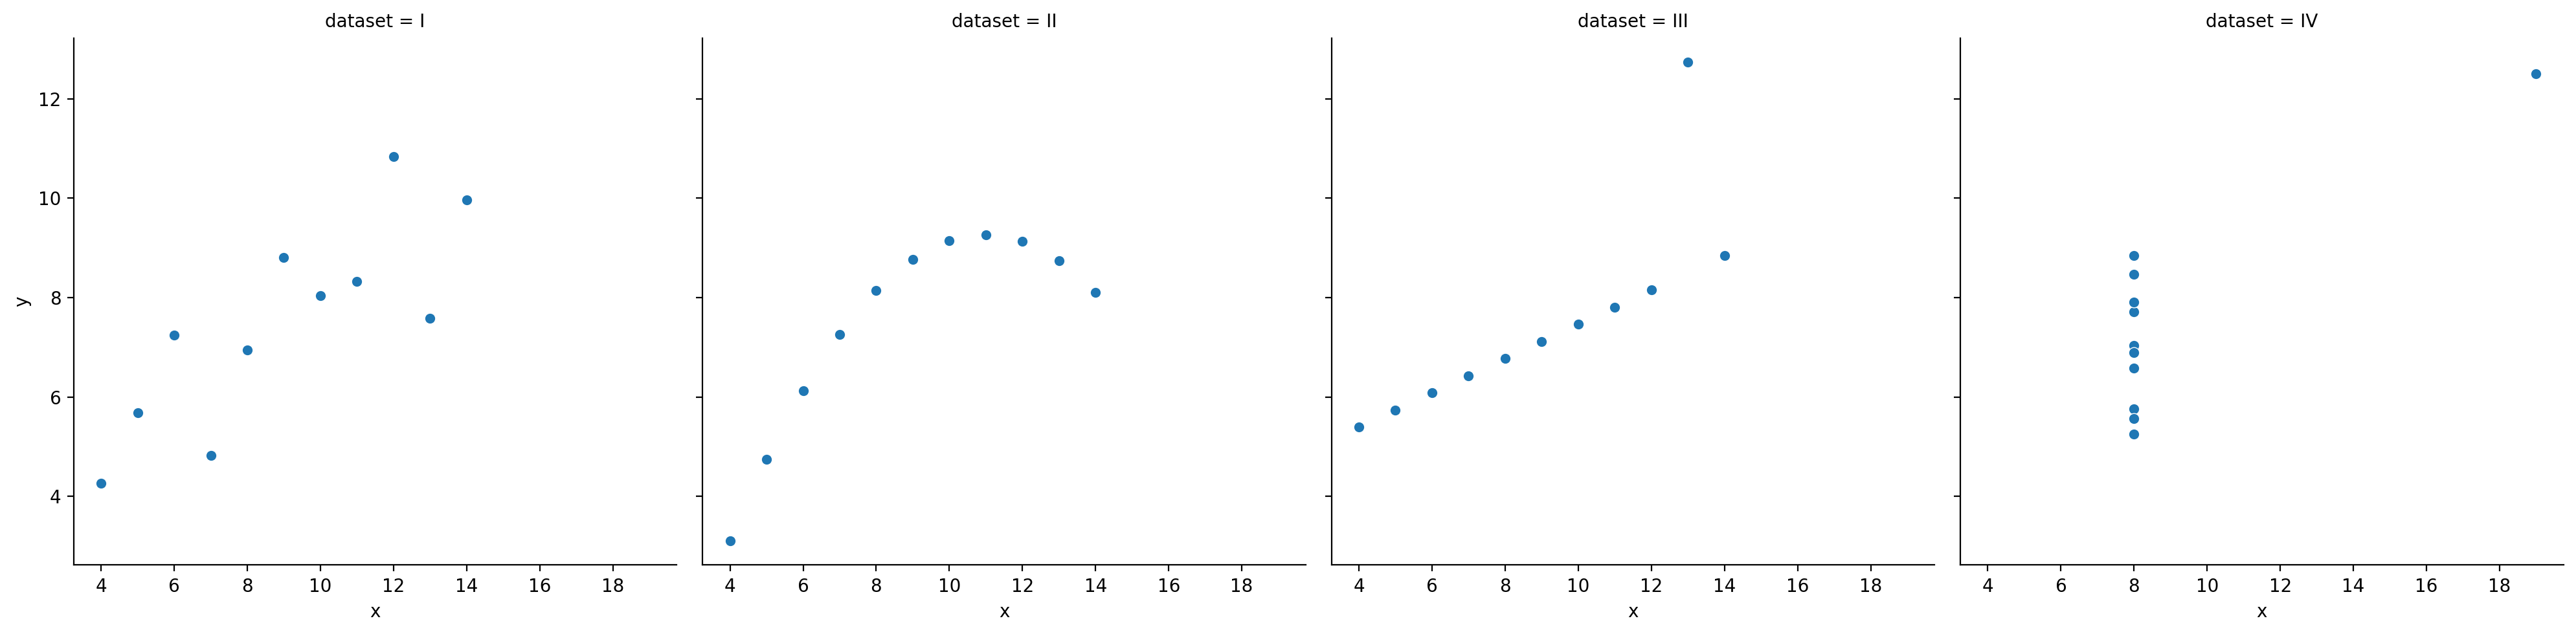

In [13]:
sns.relplot(data = anscombe_df, x = 'x', y = 'y', col = 'dataset')

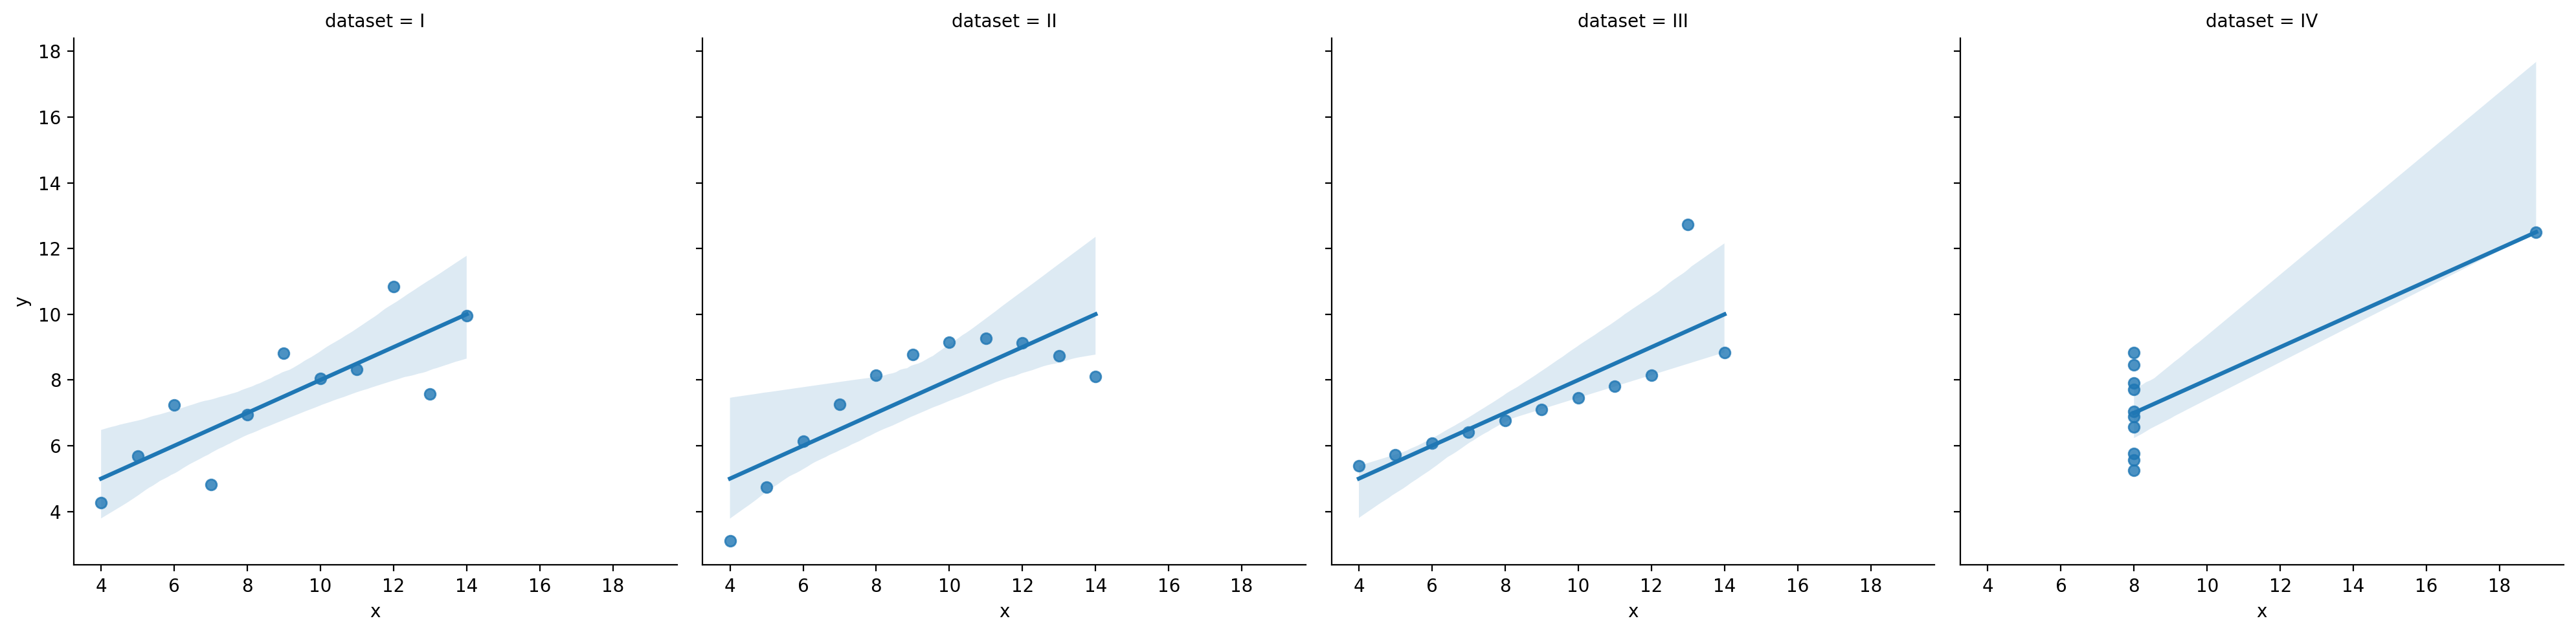

In [14]:
sns.lmplot(data = anscombe_df, x = 'x', y = 'y', col = 'dataset')

2. Load the `InsectSprays` dataset from pydataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [15]:
from pydataset import data

In [16]:
insect_sprays_df = data('InsectSprays')
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [17]:
insect_sprays_df.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


Text(0.5, 1.0, 'Comparing Effectiveness of Insect Sprays')

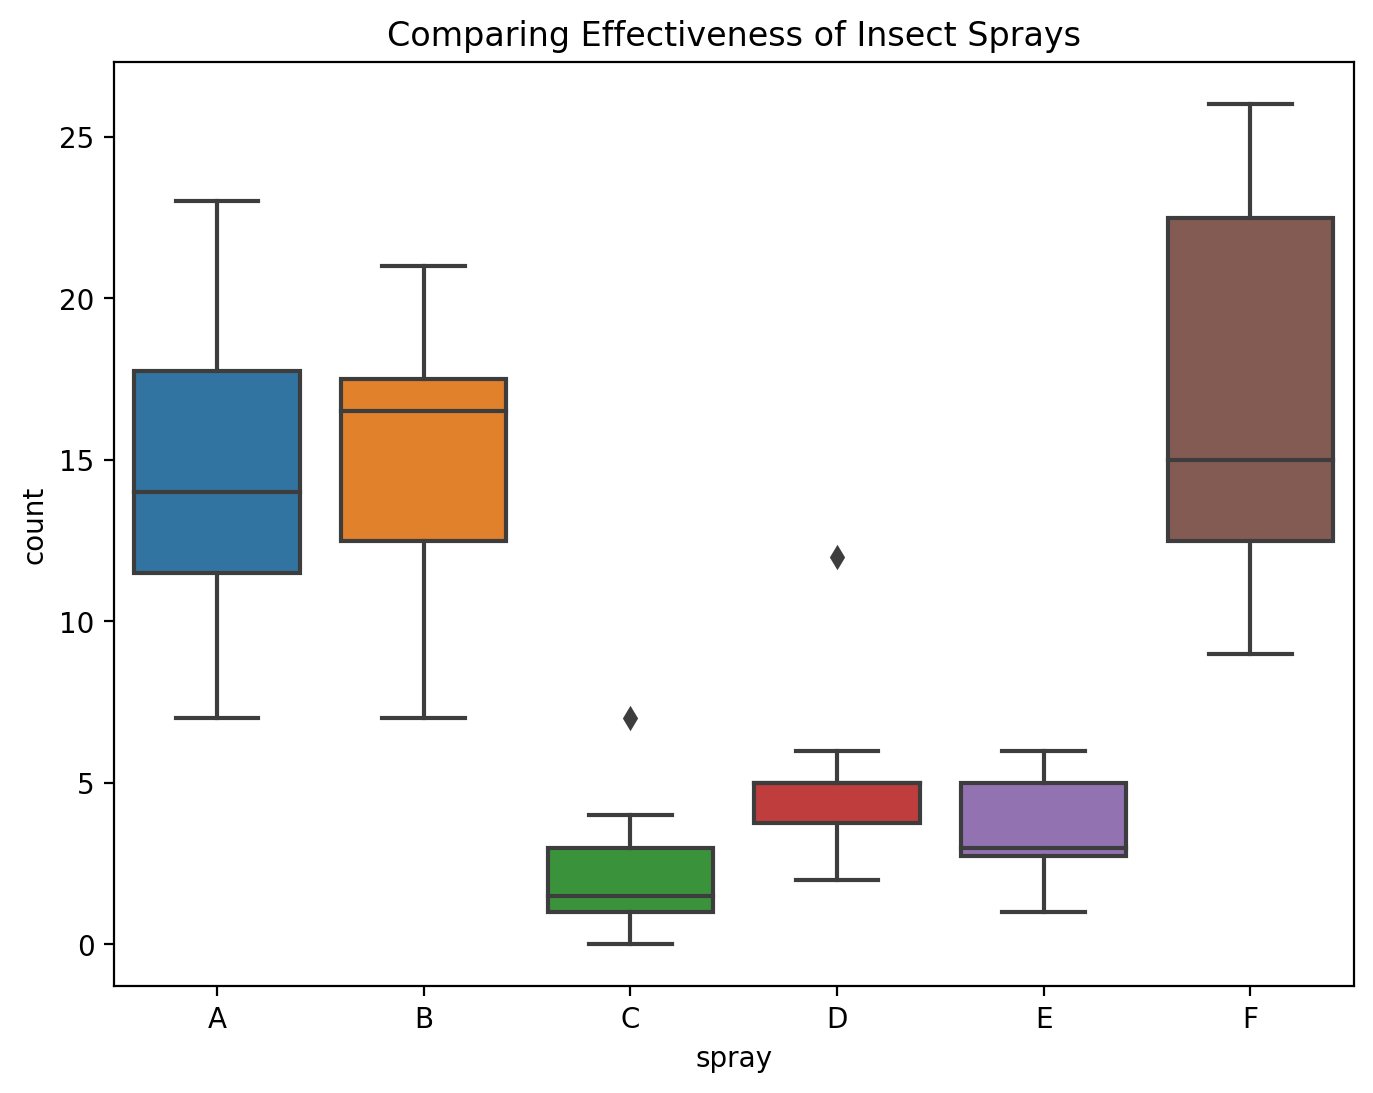

In [18]:
plt.figure(figsize=[8,6])
sns.boxplot(y='count', x='spray', data=insect_sprays_df)
plt.title('Comparing Effectiveness of Insect Sprays')


3. Load the `swiss` dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:

In [19]:
swiss = data('swiss')
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [20]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


4. Create an attribute named `is_catholic` that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
    - Does whether or not a province is Catholic influence fertility?
    - What measure correlates most strongly with fertility?

In [21]:
swiss['is_catholic'] = swiss['Catholic'] > 50

In [22]:
swiss.head(2)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True


<Axes: xlabel='is_catholic', ylabel='Fertility'>

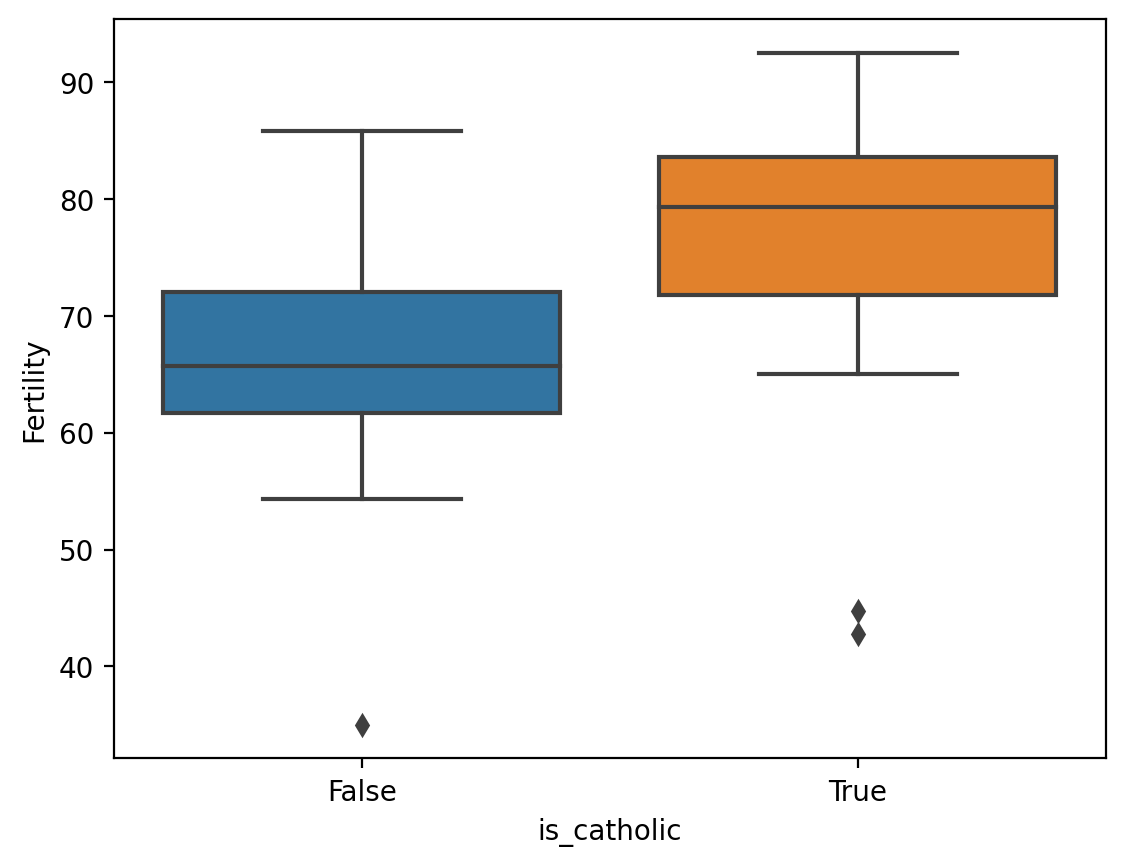

In [23]:
sns.boxplot(x='is_catholic', y='Fertility', data=swiss)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


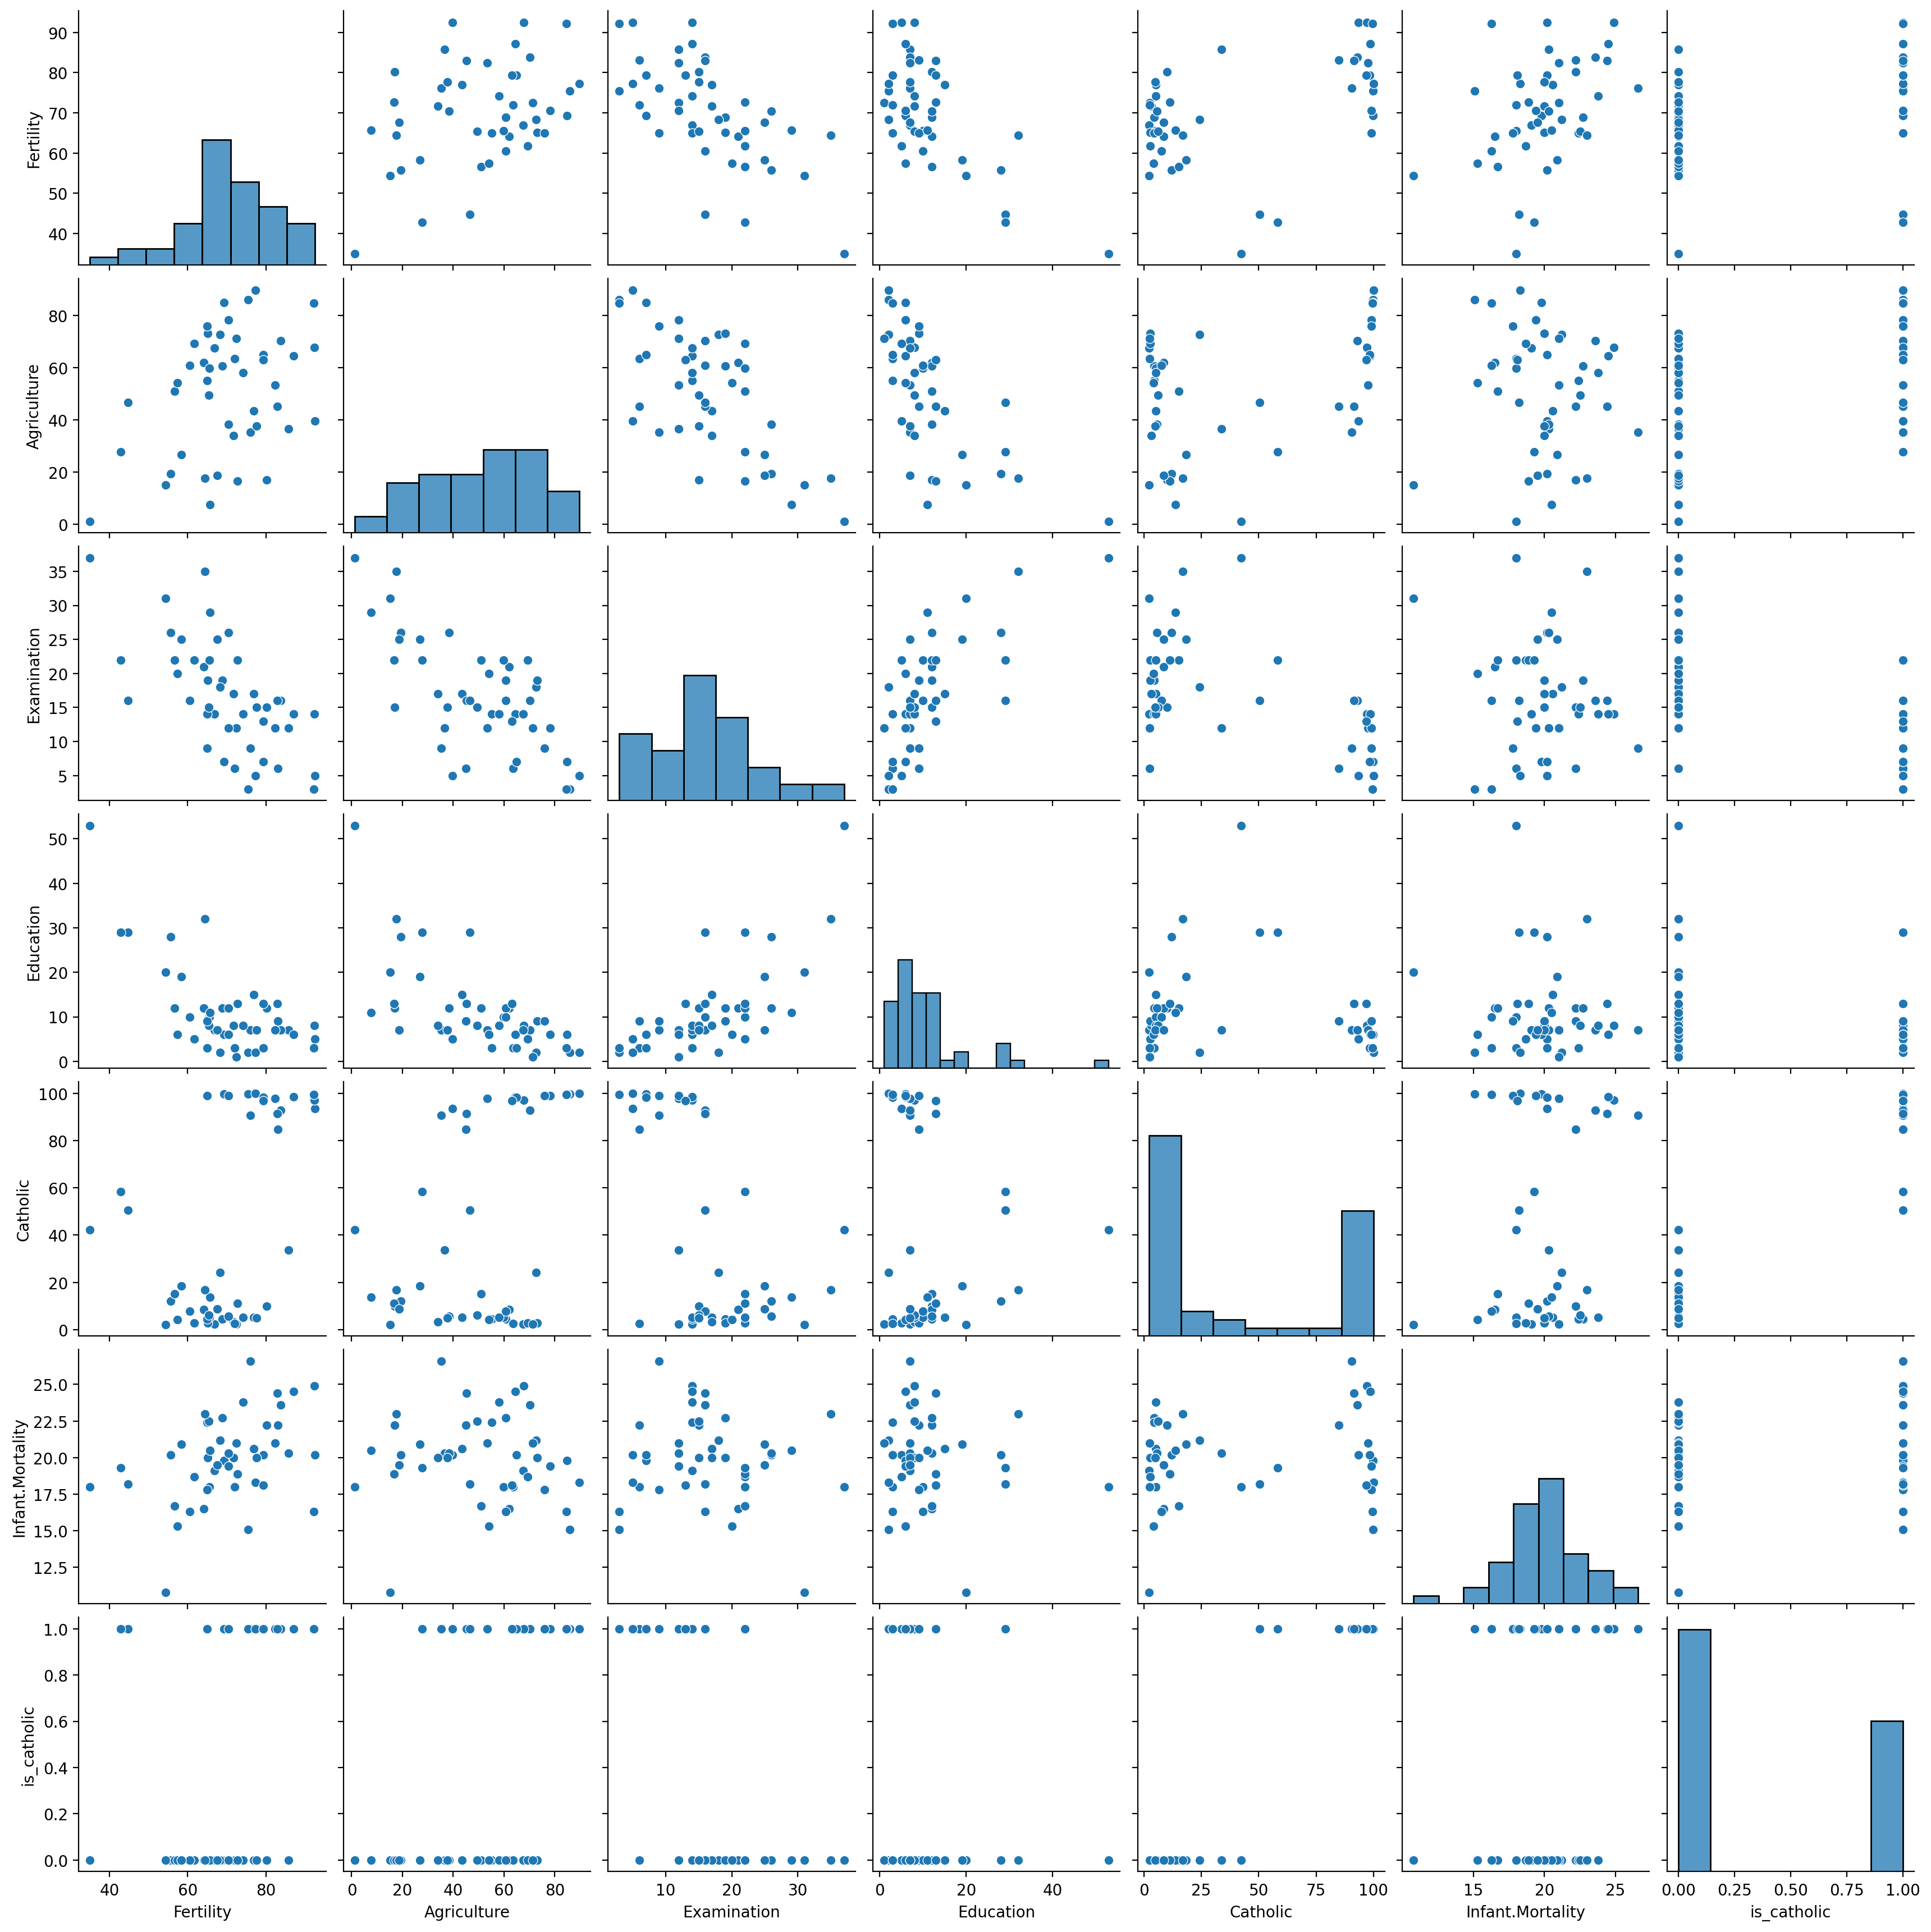

In [24]:
sns.pairplot(data=swiss)

Load the `chipotle` dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [26]:
import pandas as pd
from env import host, user, pwd

In [27]:
query = "SELECT * FROM orders"
con = f'mysql+pymysql://{user}:{pwd}@{host}/chipotle'

orders = pd.read_sql(query, con)

In [28]:
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [29]:
popular_4_items = orders.groupby('item_name')['quantity'].sum().nlargest(4).reset_index()
popular_4_items

,item_name,quantity
0,Chicken Bowl,761
1,Chicken Burrito,591
2,Chips and Guacamole,506
3,Steak Burrito,386


<Axes: xlabel='item_name', ylabel='quantity'>

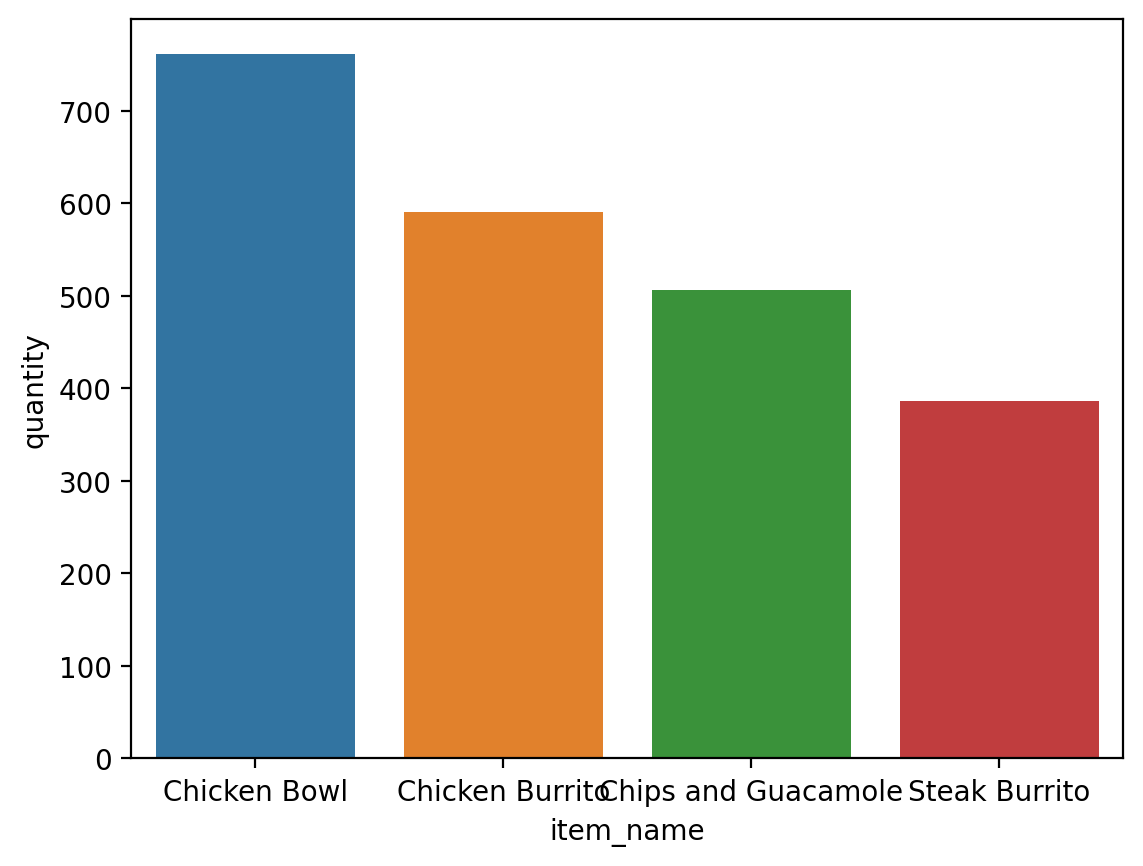

In [30]:
sns.barplot(data = popular_4_items, x='item_name', y='quantity')

5. Load the `sleepstudy` dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [31]:
sleepstudy_df = data('sleepstudy')
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [32]:
sleepstudy_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


<Axes: xlabel='Days', ylabel='Reaction'>

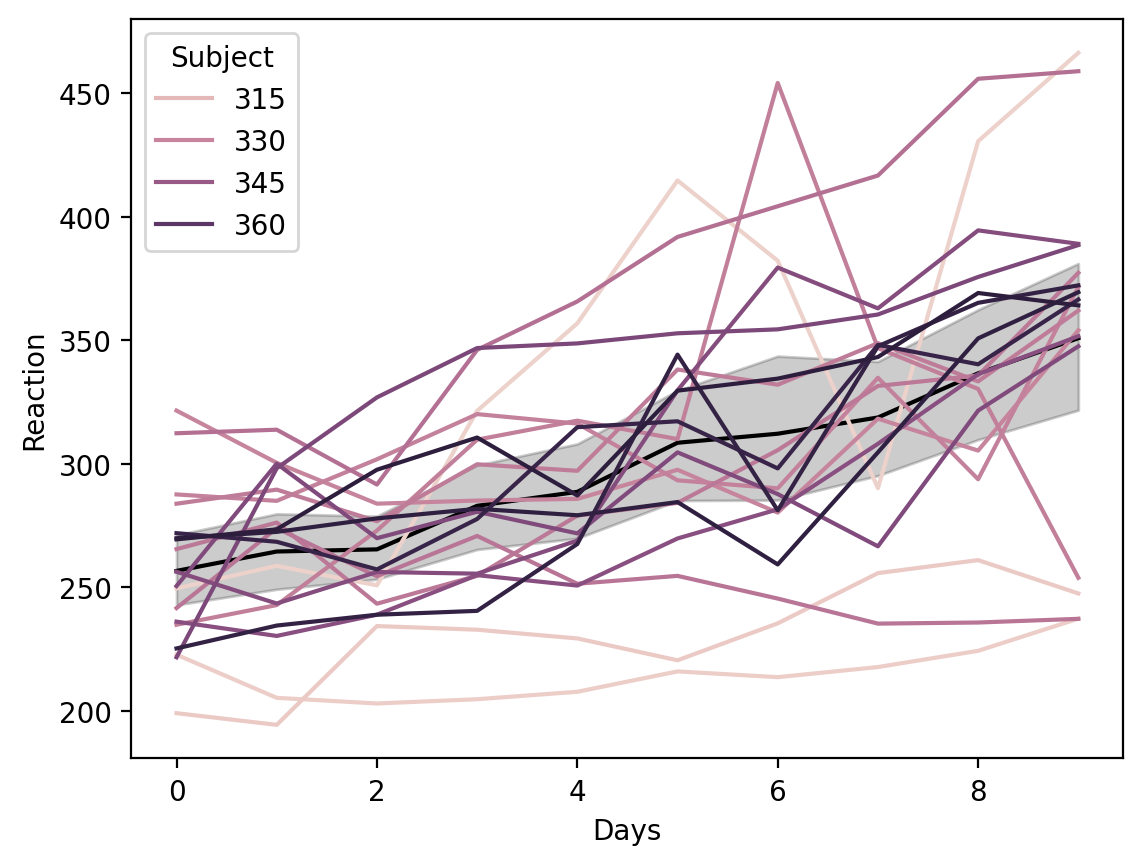

In [36]:
sns.lineplot(x = 'Days', y = 'Reaction', data=sleepstudy_df, color = 'black', estimator = 'mean')
sns.lineplot(x = 'Days', y = 'Reaction', data=sleepstudy_df, hue='Subject')


In [ ]:
sns.lineplot(x = 'Days', y = 'Reaction', data=sleepstudy_df, color = 'Subject')
